# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


### Merge the DataFrames

In [51]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides_per_citytype = pyber_data_df.groupby(["type"]).count()["ride_id"]
# total_rides_per_citytype

In [4]:
# 2. Get the total drivers for each city type
total_drivers_per_citytype = city_data_df.groupby(["type"]).sum()["driver_count"]
# total_drivers_per_citytype

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_per_citytype = pyber_data_df.groupby(["type"]).sum()["fare"]
# total_fares_per_citytype

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_citytype = pyber_data_df.groupby(["type"]).mean()["fare"]
# avg_fare_per_ride_citytype

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / total_drivers_per_citytype
# avg_fare_per_driver

In [76]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides_per_citytype, 
    "Total Drivers": total_drivers_per_citytype, 
    "Total Fares": total_fares_per_citytype, 
    "Average Fare Per Ride": avg_fare_per_ride_citytype,
    "Average Fare Per Driver": avg_fare_per_driver})
# pyber_summary_df.head()
# pyber_summary_df.dtypes

In [77]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
# pyber_summary_df.head()

In [78]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"]= pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [143]:
# 1. Read the merged DataFrame (call the one from deliv 1 - pyber_data_df )
pyber_data_df.sample(10)

,city,date,fare,ride_id,driver_count,type
2208,Rodriguezview,2019-02-21 01:34:23,36.37,4984772129854,20,Suburban
992,Christopherfurt,2019-03-18 09:24:46,7.45,4451216191000,41,Urban
592,West Heidi,2019-02-27 11:19:43,35.19,6998274661093,28,Urban
1534,Liumouth,2019-01-30 08:51:20,22.90,2852059249491,69,Urban
1558,Leahton,2019-03-03 01:24:39,43.44,4290916547911,17,Urban
18,West Anthony,2019-03-06 02:27:01,10.02,9396763280782,70,Urban
727,West Angela,2019-03-07 10:38:26,14.80,5022473192100,48,Urban
295,Leahton,2019-02-21 20:37:56,24.13,6759666489394,17,Urban
908,West Anthony,2019-04-22 08:14:31,19.95,1212046132747,70,Urban
1494,Joneschester,2019-05-05 02:00:02,21.74,2729175742345,39,Urban


In [144]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date_df = pyber_data_df.groupby(["type","date"]).sum()['fare']
# fares_by_date_df

##### you are here - everything above this line looks good

In [145]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_by_date_df = fares_by_date_df .reset_index()

fares_by_date_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [156]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_by_date_pivot = fares_by_date_df.pivot(index="date", columns="type", values="fare")
fares_by_date_pivot.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [169]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fares_by_date_pivot_filt = fares_by_date_pivot.loc['2019-01-01':'2019-04-28']
fares_by_date_pivot_filt.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [172]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fares_by_date_pivot_filt.index = pd.to_datetime(fares_by_date_pivot_filt.index)


DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-27 14:11:38', '2019-04-27 14:37:32',
               '2019-04-27 14:57:38', '2019-04-27 16:20:00',
               '2019-04-27 16:22:23', '2019-04-27 17:58:27',
               '2019-04-27 19:45:48', '2019-04-27 20:41:36',
               '2019-04-27 23:26:03', '2019-04-27 23:52:44'],
              dtype='datetime64[ns]', name='date', length=2177, freq=None)

In [178]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_date_pivot_filt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [183]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_date_df =fares_by_date_pivot_filt.resample('W').sum()
fares_by_date_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


NameError: name 'suburban_ride_count' is not defined

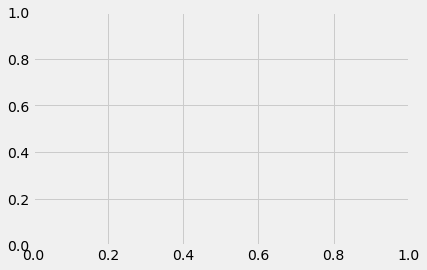

In [184]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 



# fig, ax = plt.subplots()
# ax.boxplot(suburban_ride_count, labels=x_labels)
# # Add the title, y-axis label and grid.
# ax.set_title('Ride Count Data (2019)')
# ax.set_ylabel('Number of Rides')
# ax.set_yticks(np.arange(7, 30, step=2.0))
# ax.grid()
# plt.show()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

